In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definitions

1. Title of Database: adult

2. Number of Attributes 
   6 continuous, 8 nominal attributes.

3. Attribute type: 

- age           : continuous.
- workclass     : Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt        : continuous.
- education     : Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num : continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation    : 
      Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship  : Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race          : White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex           : Female, Male.
- capital-gain  : continuous.
- capital-loss  : continuous.
- hours-per-week: continuous.
- native-country: 
      United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- class         : >50K, <=50K

3. Attribute Description: 

- age           : The age of an individual;
- workclass     : A general term to represent the employment status of an individual;
- fnlwgt        : Final weight. In other words, this is the number of people the census believes the entry represents;
- education     : The highest level of education achieved by an individual;
- education-num : The highest level of education achieved in numerical form;
- marital-status: Marital status of an individual. Married­civ­spouse corresponds to a civilian spouse while Married­AF­spouse is a spouse in the Armed Forces;
- occupation    : The general type of occupation of an individual;
- relationship  : Represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of this attribute at all;
- race          : Descriptions of an individual’s race;
- sex           : The biological sex of the individual;
- capital-gain  : capital gains for an individual;
- capital-loss  : capital loss for an individual;
- hours-per-week: The hours an individual has reported to work per week;
- native-country: Country of origin for an individual and;
- class         : Whether or not an individual makes more than $50,000 annually.

9. Class Distribution: 

 - Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
 - Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)




- ambos arquivos da pasta data são csv, contudo a separação em data/test e o cabeçalho do arquivo 'test' contendo '|1x3 Cross validator' sugere que pelo menos o arquivo 'test' passou por um processo de segmentação de datasets para estudos de machine learning. Testar modelos nos datasets se sobrar tempo.

In [2]:
columns = ['age', 'workclass', 'fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class']

In [3]:
df_adult_data=pd.read_csv('data/Adult.data',header=None,names=columns)
df_adult_test=pd.read_csv('data/Adult.test',header=None,skiprows=1,names=columns)

In [4]:
df=df_adult_data.append(df_adult_test)
df.reset_index(drop=True,inplace=True)


# Attributes check

In [5]:
df.info() ## nenhuma linha vazia 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  object
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  object
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  object
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  object
 13  native-country  48842 non-null  object
 14  class           48842 non-null  object
dtypes: int64(2), object(13)
memory usage: 5.6+ MB


## age
- Age of an individual. Continuous.


In [6]:
df['age'].unique() #mais de um tipo de dado: STR e int; nenhuma idade negativa.

array(['39', '50', '38', '53', '28', '37', '49', '52', '31', '42', '30',
       '23', '32', '40', '34', '25', '43', '54', '35', '59', '56', '19',
       '20', '45', '22', '48', '21', '24', '57', '44', '41', '29', '18',
       '47', '46', '36', '79', '27', '67', '33', '76', '17', '55', '61',
       '70', '64', '71', '68', '66', '51', '58', '26', '60', '90', '75',
       '65', '77', '62', '63', '80', '72', '74', '69', '73', '81', '78',
       '88', '82', '83', '84', '85', 'B', '86', '87', 'D', 25, 38, 28, 44,
       18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20, 37, 40, 72, 45,
       22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30, 47, 41, 19, 69,
       50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77, 80, 62, 35, 68,
       66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85, 76, 84, 89, 88,
       87], dtype=object)

In [7]:
df['age']=df['age'].astype(str) #ETL

In [8]:
df['age_is_numeric']=df['age'].apply(lambda x : x.isnumeric() ) #ETL

In [9]:
df[df['age_is_numeric']==False] #Apenas duas linhas onde a iddade não é numérica

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,age_is_numeric
22197,B,Self-emp-not-inc,182771,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,48,South,>50K,False
32540,D,State-gov,252208,HS-grad,9,Separated,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K,False


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

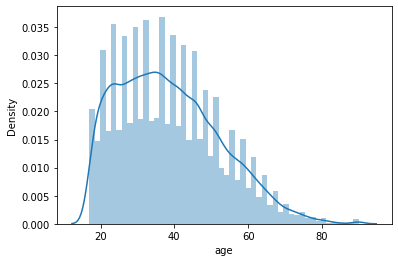

In [10]:
sns.distplot(df[df['age_is_numeric']==True]['age'])

- Uma vez que a distribuição dos dados não está muito distorcida, e a quantidade de linhas do dataset a serem tratadas é pequena se comparada ao tamanho total da base, uma tratativa plausível é substituir tais valores não numéricos pela média das idades, ao invés de, por exemplo, deletar tais linhas, evitando assim a perda de dados das outras colunas.

In [11]:
media_idades=df[df['age_is_numeric']==True]['age'].astype(float).mean() #ETL

In [12]:
df['age']=df['age'].apply(lambda x : float(x) if x.isnumeric() else media_idades) #ETL

In [13]:
np.sort(df['age'].unique())

array([17.        , 18.        , 19.        , 20.        , 21.        ,
       22.        , 23.        , 24.        , 25.        , 26.        ,
       27.        , 28.        , 29.        , 30.        , 31.        ,
       32.        , 33.        , 34.        , 35.        , 36.        ,
       37.        , 38.        , 38.64334562, 39.        , 40.        ,
       41.        , 42.        , 43.        , 44.        , 45.        ,
       46.        , 47.        , 48.        , 49.        , 50.        ,
       51.        , 52.        , 53.        , 54.        , 55.        ,
       56.        , 57.        , 58.        , 59.        , 60.        ,
       61.        , 62.        , 63.        , 64.        , 65.        ,
       66.        , 67.        , 68.        , 69.        , 70.        ,
       71.        , 72.        , 73.        , 74.        , 75.        ,
       76.        , 77.        , 78.        , 79.        , 80.        ,
       81.        , 82.        , 83.        , 84.        , 85.  

In [14]:
df.drop('age_is_numeric', axis=1, inplace=True)#ETL

## workclass
- A general term to represent the employment status of an individual;
- Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

In [15]:
df['workclass'].unique() # caracter "?", espaços em branco.

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [16]:
df['workclass']=df['workclass'].apply(lambda x: x.replace(' ',''))  #ETL

In [17]:
df[df['workclass']=='?'] # 2799 linhas sem dado. Substituir por None. 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
27,54.0,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32.0,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25.0,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67.0,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17.0,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48682,61.0,?,265201,Some-college,10,Married-civ-spouse,?,Husband,White,Male,0,0,14,United-States,<=50K.
48769,21.0,?,212661,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
48800,73.0,?,144872,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,Canada,<=50K.
48812,81.0,?,26711,Assoc-voc,11,Married-civ-spouse,?,Husband,White,Male,2936,0,20,United-States,<=50K.


In [18]:
df['workclass']=df['workclass'].apply(lambda x: None if x=='?' else x)  #ETL

## fnlwgt        
- Final weight. In other words, this is the number of people the census believes the entry represents;
- Continous

In [19]:
df['fnlwgt'].unique()

array([' 77516', ' 83311', ' 215646', ..., 349230, 321403, 83891],
      dtype=object)

In [20]:
df['fnlwgt']=df['fnlwgt'].astype(str)#ETL

In [21]:
df['fnlwgt']=df['fnlwgt'].apply(lambda x: x.replace(' ','')) #ETL

In [22]:
df['fnlwgt_is_numeric']=df['fnlwgt'].apply(lambda x : x.isnumeric() ) #ETL

In [23]:
df[df['fnlwgt_is_numeric']==False] #

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,fnlwgt_is_numeric
22818,30.0,Private,C,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,10,United-States,<=50K,False


In [24]:
media_fnlwgt=df[df['fnlwgt_is_numeric']==True]['fnlwgt'].astype(float).mean() #ETL
df['fnlwgt']=df['fnlwgt'].apply(lambda x : float(x) if x.isnumeric() else media_fnlwgt) #ETL
df.drop('fnlwgt_is_numeric', axis=1, inplace=True)#ETL

## education     
- The highest level of education achieved by an individual;
- Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

In [25]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [26]:
df['education']=df['education'].apply(lambda x: x.replace(' ',''))#ETL

## education-num 
- The highest level of education achieved in numerical form;
- Continuos

In [27]:
np.sort(df['education-num'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [28]:
df['education-num'].describe() #sem necessidade de tratamento: sem Nulos e datatype uniforme

count    48842.000000
mean        10.078089
std          2.570973
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

## marital-status
- Marital status of an individual. Married­civ­spouse corresponds to a civilian spouse while Married­AF­spouse is a spouse in the Armed Forces;
- Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

In [29]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [30]:
df['marital-status']=df['marital-status'].apply(lambda x: x.replace(' ','')) #ETL

## occupation :
- The general type of occupation of an individual;
- Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

In [31]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [32]:
df['occupation']=df['occupation'].apply(lambda x: x.replace(' ',''))#ETL
df['occupation']=df['occupation'].apply(lambda x: None if x=='?' else x) #ETL

## relationship 
- Represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat *redundant with marital status. We might not make use of this attribute at all;*
- Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

In [33]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [34]:
df['relationship']=df['relationship'].apply(lambda x: x.replace(' ',''))#ETL

## race 
- Descriptions of an individual’s race;
- White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.


In [35]:
df['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

## sex
- The biological sex of the individual;
- Female, Male.

In [36]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [37]:
df['sex']=df['sex'].apply(lambda x: x.replace(' ',''))#ETL

## capital-gain : 
- capital gains for an individual;
- continuous.

In [38]:
df['capital-gain'].unique()

array([' 2174', ' 0', ' 14084', ' 5178', ' A', ' 5013', ' 2407', ' 14344',
       ' 15024', ' 7688', ' 34095', ' 4064', ' 4386', ' 7298', ' 1409',
       ' 3674', ' 1055', ' 3464', ' 2050', ' 2176', ' 594', ' 20051',
       ' 6849', ' 4101', ' 1111', ' 8614', ' 3411', ' 2597', ' 25236',
       ' 4650', ' 9386', ' 2463', ' 3103', ' 10605', ' 2964', ' 3325',
       ' 2580', ' 3471', ' 4865', ' 99999', ' 6514', ' 1471', ' 2329',
       ' 2105', ' 2885', ' 25124', ' 10520', ' 2202', ' 2961', ' 27828',
       ' 6767', ' 2228', ' 1506', ' 13550', ' 2635', ' 5556', ' 4787',
       ' 3781', ' 3137', ' 3818', ' 3942', ' 914', ' 401', ' 2829',
       ' 2977', ' 4934', ' 2062', ' 2354', ' 5455', ' 15020', ' 1424',
       ' 3273', ' 22040', ' 4416', ' 3908', ' 10566', ' 991', ' 4931',
       ' 1086', ' 7430', ' 6497', ' 114', ' 7896', ' 2346', ' 3418',
       ' 3432', ' 2907', ' 1151', ' 2414', ' 2290', ' 15831', ' 41310',
       ' 4508', ' 2538', ' 3456', ' 6418', ' 1848', ' 3887', ' 5721',
     

In [39]:
df['capital-gain']=df['capital-gain'].astype(str)#ETL
df['capital-gain']=df['capital-gain'].apply(lambda x: x.replace(' ','')) #ETL
df['capital-gain_is_numeric']=df['capital-gain'].apply(lambda x : x.isnumeric() ) #ETL
# df[df['capital-gain_is_numeric']==False]


In [40]:
media_fnlwgt=df[df['capital-gain_is_numeric']==True]['capital-gain'].astype(float).mean() #ETL
df['capital-gain']=df['capital-gain'].apply(lambda x : float(x) if x.isnumeric() else media_fnlwgt) #ETL
df.drop('capital-gain_is_numeric', axis=1, inplace=True)#ETL

##  capital-loss 
- capital loss for an individual;
- continuous.

In [41]:
np.sort(df['capital-loss'].unique())

array([   0,  155,  213,  323,  419,  625,  653,  810,  880,  974, 1092,
       1138, 1258, 1340, 1380, 1408, 1411, 1421, 1429, 1485, 1504, 1510,
       1539, 1564, 1573, 1579, 1590, 1594, 1602, 1617, 1628, 1648, 1651,
       1668, 1669, 1672, 1719, 1721, 1726, 1735, 1740, 1741, 1755, 1762,
       1816, 1825, 1844, 1848, 1870, 1876, 1887, 1902, 1911, 1944, 1974,
       1977, 1980, 2001, 2002, 2042, 2051, 2057, 2080, 2129, 2149, 2163,
       2174, 2179, 2201, 2205, 2206, 2231, 2238, 2246, 2258, 2267, 2282,
       2339, 2352, 2377, 2392, 2415, 2444, 2457, 2465, 2467, 2472, 2489,
       2547, 2559, 2603, 2754, 2824, 3004, 3175, 3683, 3770, 3900, 4356],
      dtype=int64)

## hours-per-week
- The hours an individual has reported to work per week;
- continuous.

In [42]:
df['hours-per-week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70, 2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65, 1, 10,
       34, 75, 98, 33, 54, 8, 6, 64, 19, 18, 72, 5, 9, 47, 37, 21, 26, 14,
       4, 59, 7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84, 3, 17, 68,
       27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67, 82,
       86, 91, 81, 76, 92, 61, 74, 95, ' 40', ' 50', ' 30', ' 32', ' 10',
       ' 39', ' 35', ' 48', ' 25', ' 20', ' 45', ' 47', ' 6', ' 43',
       ' 90', ' 54', ' E', ' 38', ' 36', ' 18', ' 24', ' 60', ' 44',
       ' 56', ' 28', ' 16', ' 41', ' 22', ' 55', ' 14', ' 33', ' 37',
       ' 8', ' 12', ' 70', ' 15', ' 75', ' 52', ' 84', ' 42', ' 80',
       ' 68', ' 99', ' 65', ' 5', ' 17', ' 72', ' 53', ' 29', ' 96',
       ' 21', ' 46', ' 3', ' 1', ' 23', ' 49', ' 67', ' 76', ' 7', ' 2',
       ' 58', ' 26', ' 34', ' 4', ' 51', ' 78', ' 63', ' 31', ' 92',
       ' 77', ' 27', ' 85', ' 13', ' 19', ' 98', ' 62', ' 66', ' 57'

In [43]:
df['hours-per-week']=df['hours-per-week'].astype(str)#ETL
df['hours-per-week']=df['hours-per-week'].apply(lambda x: x.replace(' ','')) #ETL
df['hours-per-week_is_numeric']=df['hours-per-week'].apply(lambda x : x.isnumeric() ) #ETL
# df[df['capital-gain_is_numeric']==False]
media_fnlwgt=df[df['hours-per-week_is_numeric']==True]['hours-per-week'].astype(float).mean() #ETL
df['hours-per-week']=df['hours-per-week'].apply(lambda x : float(x) if x.isnumeric() else media_fnlwgt) #ETL
df.drop('hours-per-week_is_numeric', axis=1, inplace=True)#ETL

## native-country: 
- Country of origin for an individual and;
- United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. 

In [44]:
np.sort(list(df['native-country'].unique()))

array([' ?', ' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',
       ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos',
       ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru',
       ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico',
       ' Scotland', ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago',
       ' United-States', ' Vietnam', ' Yugoslavia'], dtype='<U27')

In [45]:
df['native-country']=df['native-country'].astype(str) #ETL
df['native-country']=df['native-country'].apply(lambda x: x.replace(' ','')) #ETL
df['native-country']=df['native-country'].apply(lambda x: None if x=='?' else x) #ETL

## class : 
- Whether or not an individual makes more than $50,000 annually.
->50K, <=50K

In [46]:
df['class'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [47]:
df['class']=df['class'].apply(lambda x: x.replace(' ','').replace('.','')) 

In [48]:
df['class_bin']=df['class'].apply(lambda x: 0 if x=='<=50K' else 1)

# EXPLORE

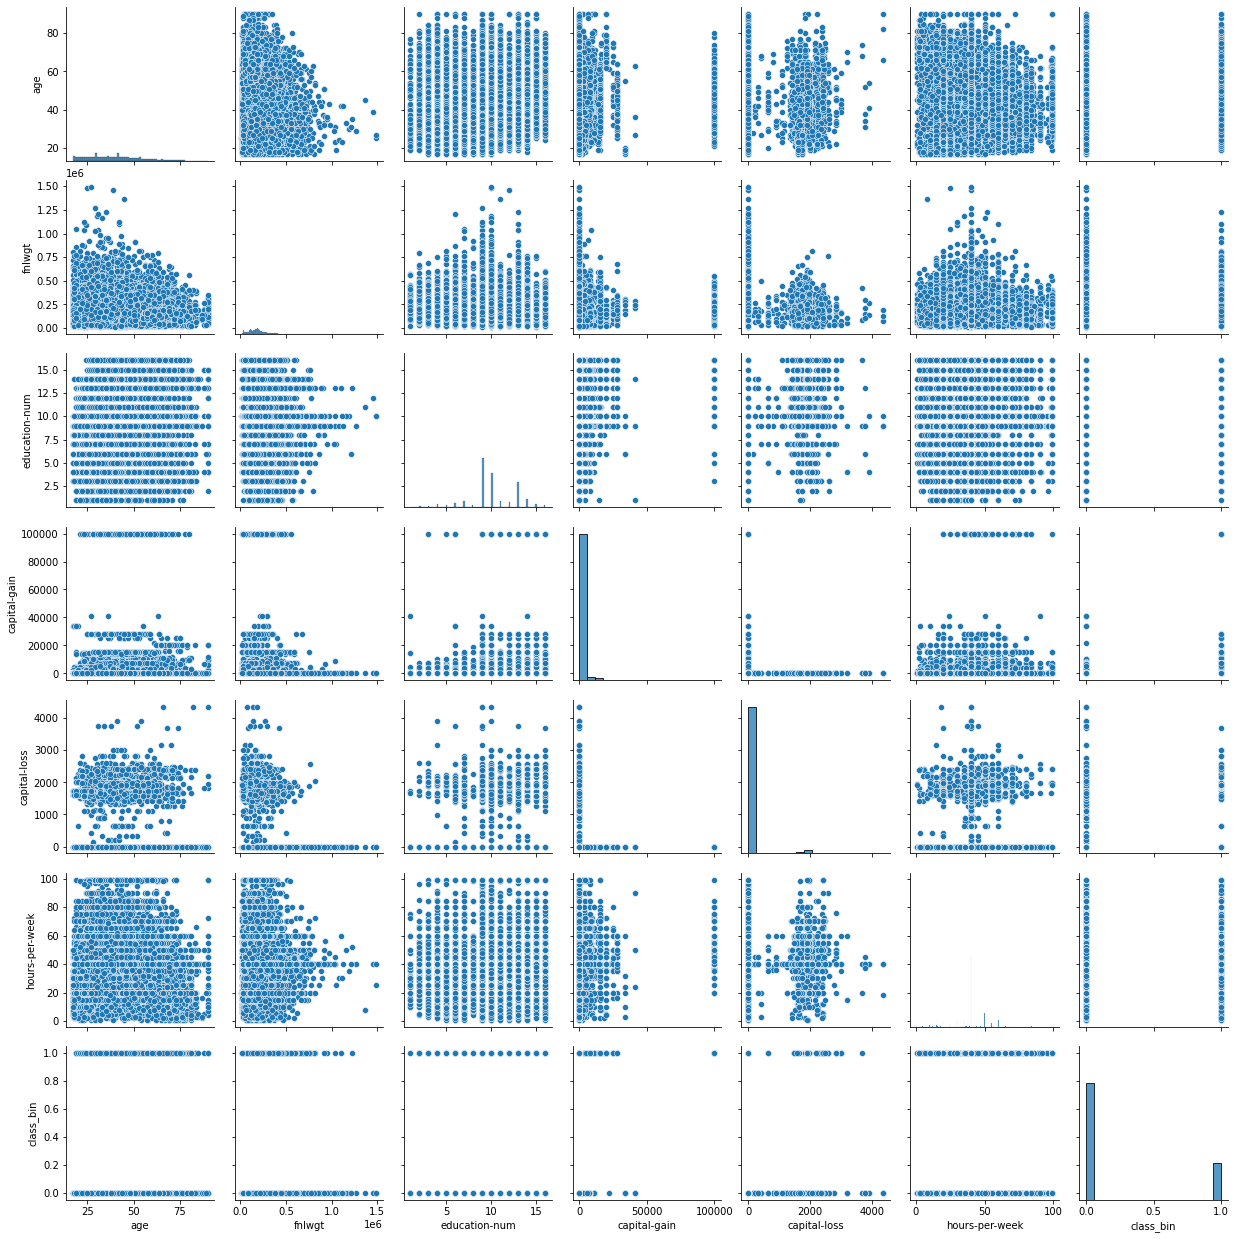

In [49]:
sns.pairplot(df)

 - Sem correlação aparente entre variáveis numéricas desnormalizadas
 - Uma vez que a variável alvo é 'class', avaliar distribuição de outras variáveis categoricas com a variável alvo
 - avaliar variaveis numericas e variavel categorica 

# Inserção em tabela Postgres
- pd.to_sql() com conn de sqlalachemy
- garantir datatype na tabela (argument dtype={column:datatype}


# Machine Learninng Model

In [111]:
data = df.iloc[:,:-1]

X= data.iloc[:,:-1]#.values
X= pd.get_dummies(X)
Y=data['class']#.values

In [113]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.75)

## Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [106]:
predictions = logisticRegr.predict(x_test)

In [107]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.8002620587994431


In [108]:
from sklearn import metrics

In [109]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[9036  305]
 [2134  736]]


## Naive Bayes

In [115]:
from sklearn.naive_bayes import GaussianNB

In [118]:
gaussian = GaussianNB()

In [119]:
gaussian.fit(x_train, y_train)

GaussianNB()

In [120]:
predictions = gaussian.predict(x_test)

In [121]:
score = gaussian.score(x_test, y_test)
print(score)

0.7982147244287937


In [122]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[8878  482]
 [1982  869]]
